In [1]:
from collections import namedtuple

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [2]:
from sympy.physics.units import convert_to, newton, meter
mm = meter / 1000
cm = meter / 100
MPa = 1e6 * newton / meter**2
GPa = 1e9 * newton / meter**2

# Instron data

In [3]:
def load(file):
    data = pd.read_csv(file, header=[0,1], index_col=0)

    data.columns= ['extension', 'load']

    data.extension *= mm
    data.load *= newton
    
    return data

In [4]:
sample1 = load('data/Packing_Peanuts_Instron/Starch_1.is_comp_RawData/Specimen_RawData_1.csv')

In [5]:
def process(data, area, length, strain_offset = 0):
    data['stress'] = -data.load / area
    data['strain'] = -data.extension / length - strain_offset - 0.05
    data = data[(data.strain > 0) & (data.stress > 0)]
    return data

#process(sample1, 10*mm**2, 10*mm)

In [6]:
starches = []

for file, area, length, offset in [
    ('data/Packing_Peanuts_Instron/Starch_1.is_comp_RawData/Specimen_RawData_1.csv', 2.516*cm**2, 21.3*mm, 0.035),
    ('data/Packing_Peanuts_Instron/Starch_1.is_comp_RawData/Specimen_RawData_2.csv', 2.601*cm**2, 22.5*mm, 0),
    ('data/Packing_Peanuts_Instron/Starch_1.is_comp_RawData/Specimen_RawData_3.csv', 2.986*cm**2, 22.7*mm, 0.03),
    ('data/Packing_Peanuts_Instron/Starch_1.is_comp_RawData/Specimen_RawData_4.csv', 2.688*cm**2, 21.0*mm, 0.07),
]:
    sample = load(file)
    sample = process(sample, area, length, offset)
    starches.append(sample)

In [7]:
styrenes = []

for file, area, length, offset in [
    ('data/Packing_Peanuts_Instron/Pink_1.is_comp_RawData/Specimen_RawData_1.csv', 415*mm**2, 13.8*mm, 0.02),
    ('data/Packing_Peanuts_Instron/Pink_1.is_comp_RawData/Specimen_RawData_2.csv', 415*mm**2, 15.6*mm, 0),
    ('data/Packing_Peanuts_Instron/Pink_1.is_comp_RawData/Specimen_RawData_3.csv', 415*mm**2, 14.8*mm, 0.06),
    ('data/Packing_Peanuts_Instron/Pink_1.is_comp_RawData/Specimen_RawData_4.csv', 415*mm**2, 15.5*mm, 0),
]:
    sample = load(file)
    sample = process(sample, area, length, offset)
    styrenes.append(sample)

In [8]:
# fig = plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

# plt.xlabel('Strain (mm/mm)')
# plt.ylabel('Stress (MPa)')
# plt.title('Biodegradable packing peanuts')

# for i, sample in enumerate(starches):
#     plt.plot(sample.strain, sample.stress / MPa, label=f'Trial {i+1}')

# plt.legend();

In [9]:
# fig = plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

# plt.xlabel('Strain (mm/mm)')
# plt.ylabel('Stress (MPa)')
# plt.title('Styrene packing peanuts')

# for i, sample in enumerate(styrenes):
#     plt.plot(sample.strain, sample.stress / MPa, label=f'Trial {i+1}')

# plt.legend();

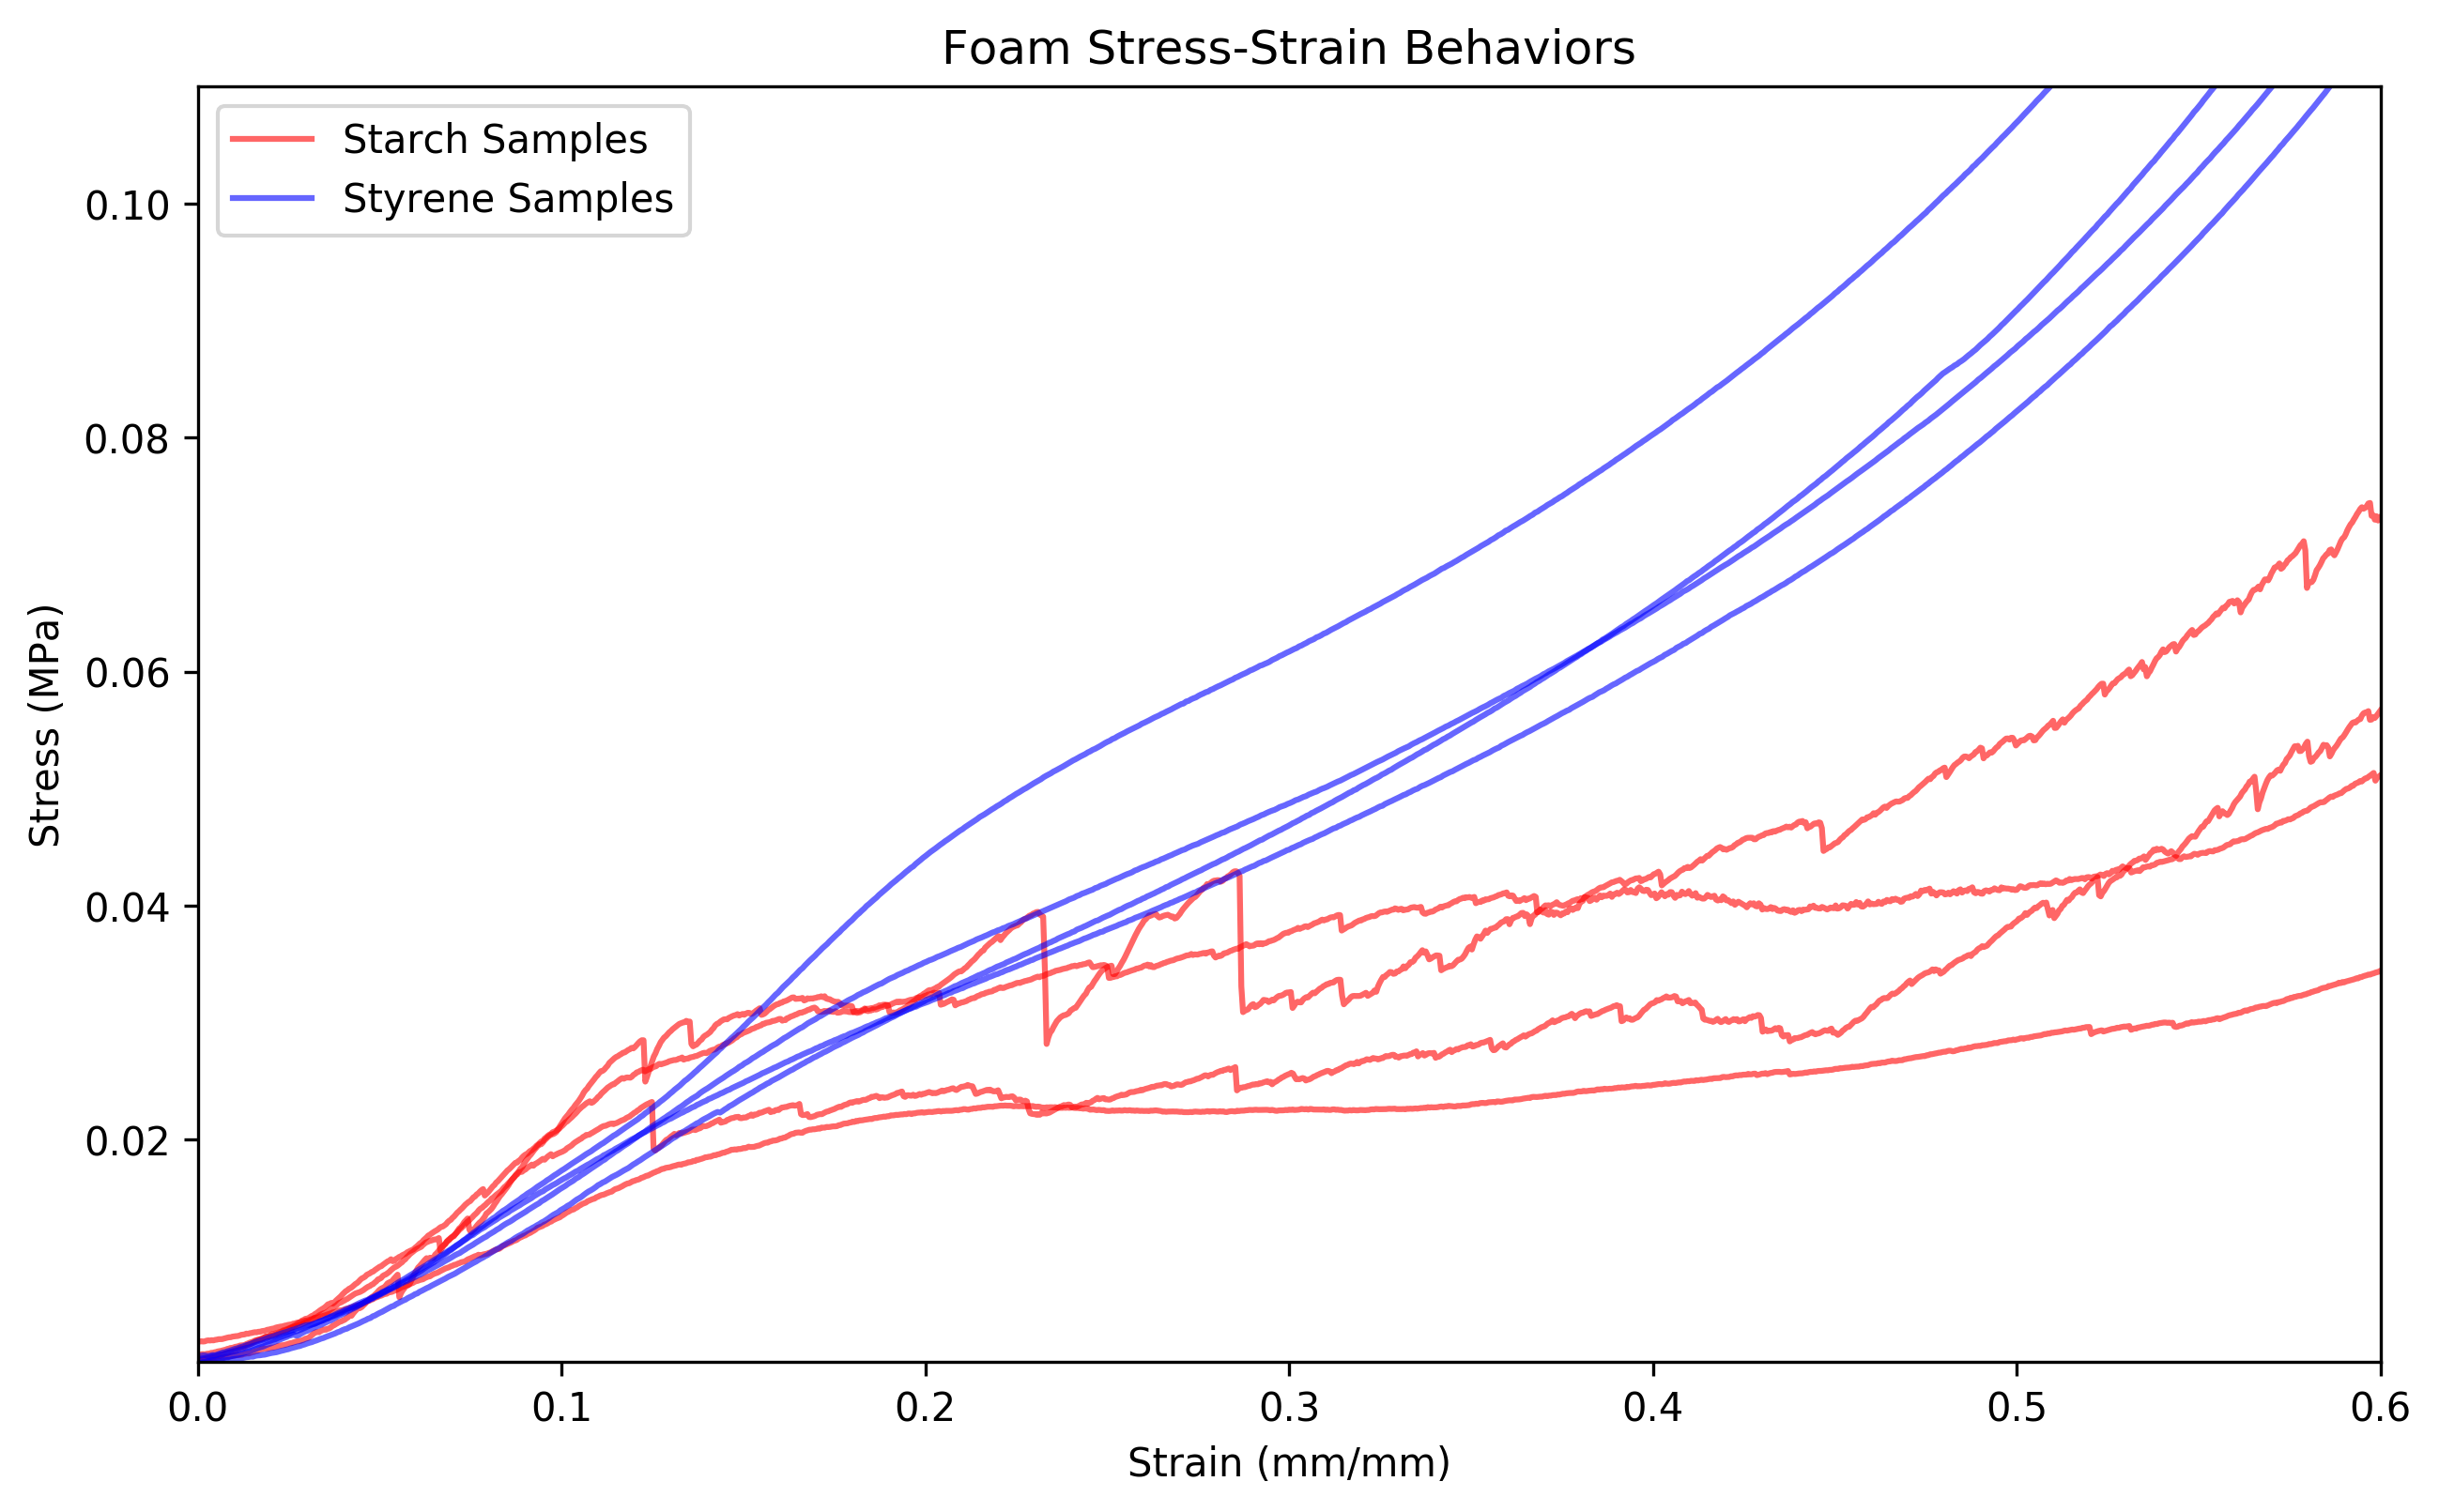

In [10]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=300, facecolor='w', edgecolor='k')

plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.title('Foam Stress-Strain Behaviors')

for i, sample in enumerate(starches):
    starch_line = plt.plot(sample.strain, sample.stress / MPa, 'r', alpha=0.6)[0]

for i, sample in enumerate(styrenes):
    styrene_line = plt.plot(sample.strain, sample.stress / MPa, 'b', alpha=0.6)[0]

plt.xlim(0, 0.6)
plt.ylim(0.001, 0.11)

plt.legend([starch_line, styrene_line], ["Starch Samples", "Styrene Samples"]);

# Impact Data

In [16]:
def load_impact(file):
    data = pd.read_csv(file, header=[0,1], index_col=0)

    data.columns= ['extension', 'load']

    data.extension *= mm
    data.load *= newton
    
    return data

In [19]:
def process_impact(data, length):
    area = 150 * cm ** 2
    data['stress'] = -data.load / area
    data['strain'] = -data.extension / length - strain_offset - 0.05
    data = data[(data.strain > 0) & (data.stress > 0)]
    return data

#process(sample1, 10*mm**2, 10*mm)

In [22]:
starch_impact = []

for file, *args in [
    ('data/Impact_Data/White 6x8 A 1m 2nd_1_Spec_1_Ch_1.csv', 21.3*mm),
]:
    sample = load_impact(file)
    sample = process_impact(sample, *args)
    starch_impact.append(sample)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 7
